In [28]:
import numpy as np
import pandas as pd
import os
from pprint import pprint
from collections import defaultdict
import seq_helper as seqh
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE

from sklearn.decomposition import PCA
from matplotlib.cm import spectral
import matplotlib.pyplot as plt

In [25]:
F_path_name = ''.join(['./matrix_data/','F.csv'])
Q_path_name = ''.join(['./matrix_data/','Q.csv'])
L_path_name = ''.join(['./matrix_data/','L.csv'])

F = np.array(pd.read_csv(F_path_name,sep=",", header = None))
Q = np.array(pd.read_csv(Q_path_name,sep=",", header = None))
L = np.array(pd.read_csv(L_path_name,sep=",", header = None))
L = np.reshape(L.astype(int),(-1))

F.shape, Q.shape, L.shape

((359, 256), (359, 35), (359,))

(359, 35) (359, 2) (2, 35)


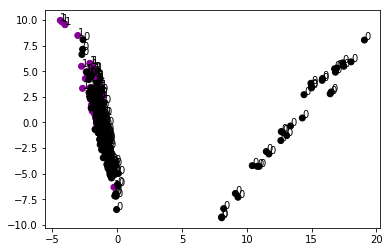

In [27]:
# PCA
x = Q

mean_x = np.mean(x, axis=0)
std_x = np.std(x, axis=0)
x_standard = (x-mean_x)/std_x
pca = PCA(n_components=2).fit(x_standard)
projected_x = pca.transform(x_standard)
print(x_standard.shape, projected_x.shape, pca.components_.shape)

#for i in label draw
fig, ax = plt.subplots()

c=[spectral(float(i) /10) for i in L]
ax.scatter(projected_x[:,0],projected_x[:,1], c=c)
txt = [str(i) for i in L] #[label_text_dict[i] for i in label]
for i in range(x.shape[0]):
    ax.annotate(txt[i], (projected_x[i,0],projected_x[i,1]),size=10)

plt.show()

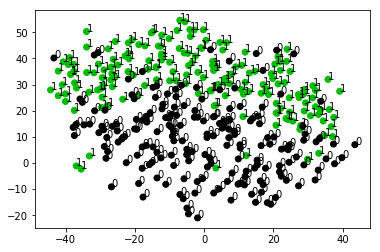

In [30]:
# TSNE
tsne = TSNE(n_components=2, perplexity=30.0, random_state=0)
F_reduce = tsne.fit_transform(F)

#for i in label draw
fig, ax = plt.subplots()

c=[spectral(float(i) /2) for i in L]
ax.scatter(F_reduce[:,0],F_reduce[:,1], c=c)
txt = [str(i) for i in L] #[label_text_dict[i] for i in label]
for i in range(x.shape[0]):
    ax.annotate(txt[i], (F_reduce[i,0],F_reduce[i,1]),size=10)

plt.show()